In [1]:
!nvidia-smi

Sat Sep 24 15:15:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#                                                  Assignment

About dataset
- The dataset of vibration sensor is provided in the attachment.
- The dataset contains two CSV files collected from an industrial gearbox of some machine.
- One file is for healthy and another one is for faulty class.
- The data has four columns representing vibration of the machine collected from 4 vibration
sensors placed at different locations on the machine.
- Sample of the data is as follows
Column 1 to 4 represents data from 4 sensors.

                                            Sensor 1Sensor 2Sensor 3Senor 4
                                            -1.90E+01-2.50E-01-1.88E-011.06E+00
                                            -9.94E+008.53E+007.55E+004.70E+00
                                            2.14E+01-4.74E+00-2.78E-015.95E+00
                                            8.52E+00-5.93E-011.26E+003.64E+00
                                            -2.11E+01-5.58E-018.98E+001.93E-02
                                            3.84E+002.49E+00-4.13E+002.50E+00
                                            3.86E+002.76E+00-5.86E+001.64E+00
                                            -2.30E+01-4.73E+004.99E+00-3.57E+00
                                            1.94E-01-1.65E+00-5.02E+004.37E+00
                                            9.15E+00-1.94E+00-5.89E+006.25E+00
                                            -9.06E+00-2.31E+009.59E-014.41E+00
                                            -1.52E+00-8.33E-01-5.45E+008.74E+00
                                            6.07E-011.92E+00-1.47E+003.22E+00
                                            -6.75E+00-2.19E+001.60E+001.04E+00

Note:
As the data is continuous, you can assume to take 500 to 1000 samples as a single sample and
develop the model.
Problem Definition
- Design and develop an ML / DL based approach to identify whether the given data is healthy
or faulty.
- Target – The F-measure should be &gt;= 0.95
- Time for testing/inference should be &lt; 10 millisecond
Deliverables
- Documentation on the proposed model with suitable diagrams
- Training, validation analysis with suitable graphs and comments of the model created
- Testing on the test set and its result analysis
- Description on the developed model and it current status and how do you say that the model is good for deployment.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew

import tensorflow as tf
import keras

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/samsung_data/FaultyDataset.csv', names = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4'])
df2 = pd.read_csv('/content/drive/MyDrive/samsung_data/HealthyDataset.csv', names = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4'])

df1.head(), df2.head()

(   Sensor1  Sensor2  Sensor3  Sensor4
 0    -3.93     6.55   -1.240    20.30
 1     2.40     9.99   -3.240     8.31
 2     6.24    -3.18   -0.687    -4.19
 3    -3.99   -14.10    3.850    -5.66
 4     1.77    -6.46    5.100    -9.00,    Sensor1  Sensor2  Sensor3  Sensor4
 0   -19.00   -0.250   -0.188   1.0600
 1    -9.94    8.530    7.550   4.7000
 2    21.40   -4.740   -0.278   5.9500
 3     8.52   -0.593    1.260   3.6400
 4   -21.10   -0.558    8.980   0.0193)

In [4]:
df1.describe(), df2.describe()

(            Sensor1       Sensor2       Sensor3       Sensor4
 count  94208.000000  94208.000000  94208.000000  94208.000000
 mean      -0.009915      0.002396     -0.014725      0.005150
 std        4.757352      4.355543      3.910184      4.596443
 min      -24.300000    -28.600000    -18.600000    -27.300000
 25%       -3.040000     -2.500000     -2.190000     -2.540000
 50%       -0.131000      0.147000      0.057150      0.188000
 75%        2.870000      2.740000      2.220000      2.690000
 max       24.000000     24.500000     23.800000     27.600000,
             Sensor1       Sensor2       Sensor3       Sensor4
 count  99840.000000  99840.000000  99840.000000  99840.000000
 mean       0.006417     -0.004324      0.015985      0.009514
 std        8.101257      4.610642      4.490550      5.153772
 min      -50.800000    -28.500000    -27.000000    -31.300000
 25%       -4.620000     -2.630000     -2.560000     -2.870000
 50%       -0.254000      0.093900      0.085200      

In [5]:
df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94208 entries, 0 to 94207
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sensor1  94208 non-null  float64
 1   Sensor2  94208 non-null  float64
 2   Sensor3  94208 non-null  float64
 3   Sensor4  94208 non-null  float64
dtypes: float64(4)
memory usage: 2.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99840 entries, 0 to 99839
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sensor1  99840 non-null  float64
 1   Sensor2  99840 non-null  float64
 2   Sensor3  99840 non-null  float64
 3   Sensor4  99840 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB


(None, None)

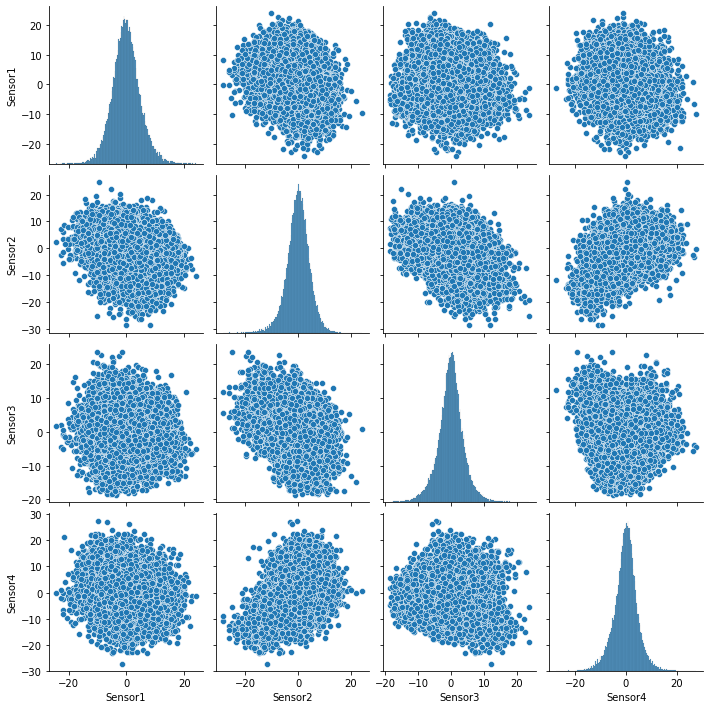

In [6]:
sns.pairplot(df1, kind ='scatter')

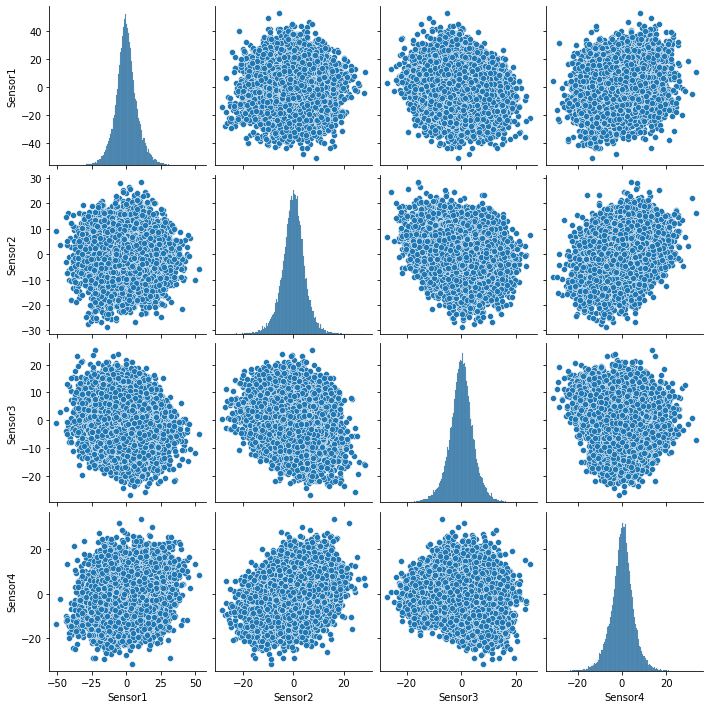

In [7]:
sns.pairplot(df2, kind ='scatter')

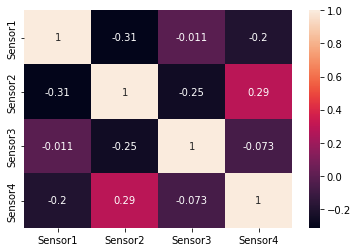

In [8]:
correlation1 = df1.corr()
plt.figure()
sns.heatmap(correlation1, annot=True)
plt.show()

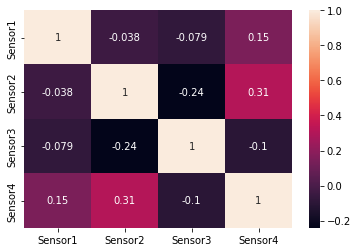

In [9]:
correlation2 = df2.corr()
plt.figure()
sns.heatmap(correlation2, annot=True)
plt.show()

In [10]:
correlation1 = df1.corr()
correlation2 = df2.corr()

correlation1, correlation2

(          Sensor1   Sensor2   Sensor3   Sensor4
 Sensor1  1.000000 -0.314104 -0.011016 -0.197975
 Sensor2 -0.314104  1.000000 -0.254380  0.289160
 Sensor3 -0.011016 -0.254380  1.000000 -0.072555
 Sensor4 -0.197975  0.289160 -0.072555  1.000000,
           Sensor1   Sensor2   Sensor3   Sensor4
 Sensor1  1.000000 -0.038246 -0.078913  0.150780
 Sensor2 -0.038246  1.000000 -0.240925  0.309077
 Sensor3 -0.078913 -0.240925  1.000000 -0.102090
 Sensor4  0.150780  0.309077 -0.102090  1.000000)

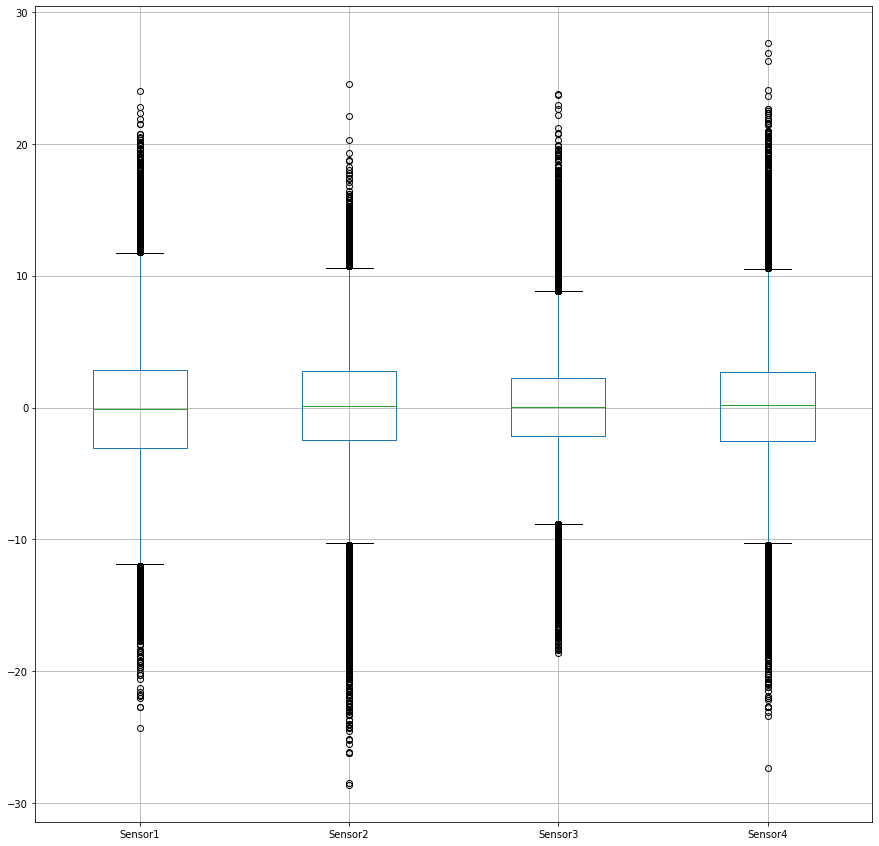

In [11]:
plt.figure(figsize=(15,15))
df1.boxplot()

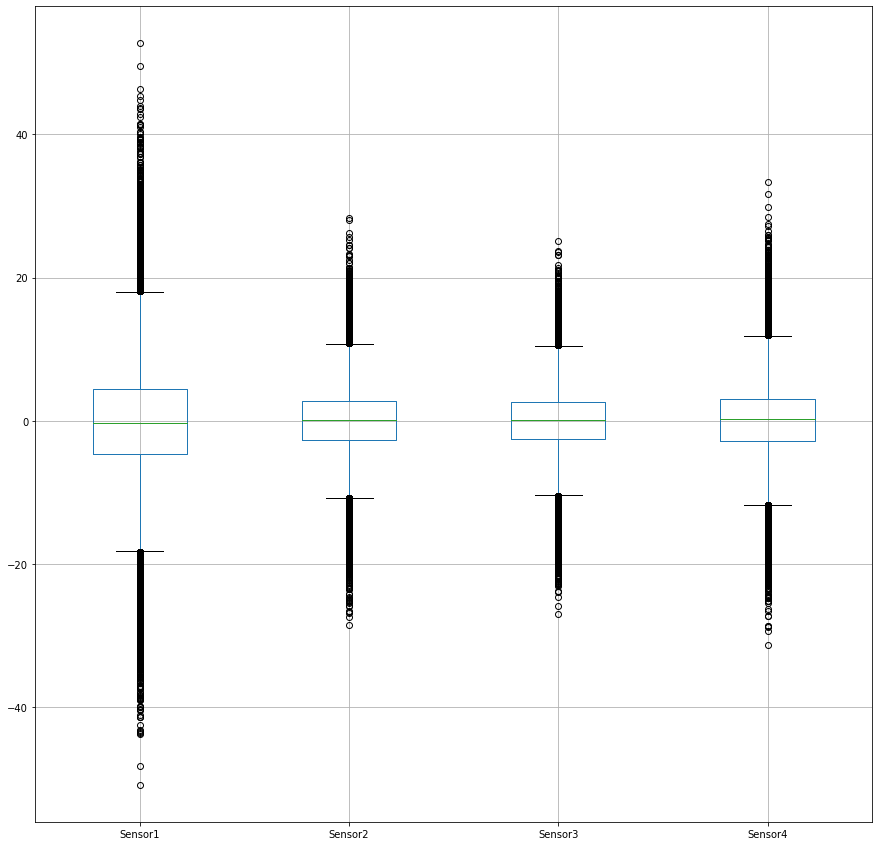

In [12]:
plt.figure(figsize=(15,15))
df2.boxplot()

In [13]:
df1['Output'] = 0
df1.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Output
0,-3.93,6.55,-1.240,20.30,0
1,2.40,9.99,-3.240,8.31,0
2,6.24,-3.18,-0.687,-4.19,0
3,-3.99,-14.10,3.850,-5.66,0
4,1.77,-6.46,5.100,-9.00,0


In [14]:
df2['Output'] = 1
df2.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Output
0,-19.00,-0.250,-0.188,1.0600,1
1,-9.94,8.530,7.550,4.7000,1
2,21.40,-4.740,-0.278,5.9500,1
3,8.52,-0.593,1.260,3.6400,1
4,-21.10,-0.558,8.980,0.0193,1


In [15]:
df = pd.concat([df1,df2])
df

,Sensor1,Sensor2,Sensor3,Sensor4,Output
0,-3.930,6.550,-1.240,20.3000,0
1,2.400,9.990,-3.240,8.3100,0
2,6.240,-3.180,-0.687,-4.1900,0
3,-3.990,-14.100,3.850,-5.6600,0
4,1.770,-6.460,5.100,-9.0000,0
...,...,...,...,...,...
99835,-7.610,-0.149,1.200,0.7800,1
99836,-0.584,1.620,-1.850,4.4500,1
99837,1.190,2.870,-1.310,8.0100,1
99838,-0.940,-1.160,1.560,6.0000,1


In [16]:
df.isna().sum()

Sensor1    0
Sensor2    0
Sensor3    0
Sensor4    0
Output     0
dtype: int64

Sensor1
0.12178423703454917


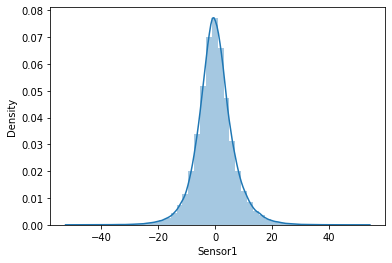

Sensor2
-0.26162667222802843


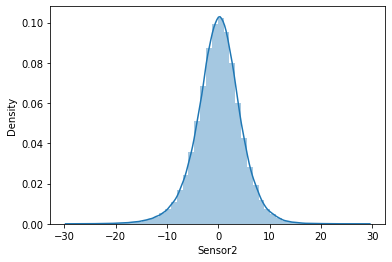

Sensor3
-0.1048750878037955


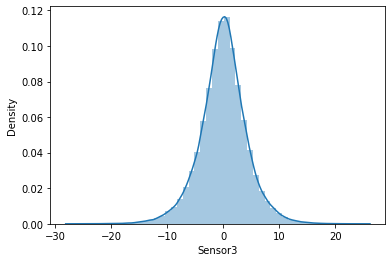

Sensor4
-0.16055427037811484


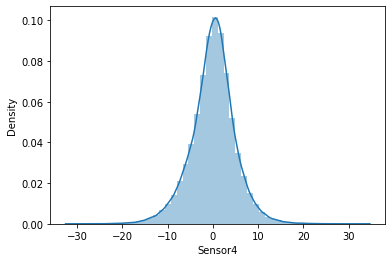

Output
-0.05807195782299578


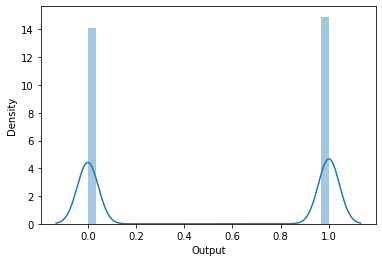

In [17]:
for i in df:
    print(i)
    print(skew(df[i]))

    plt.figure()
    sns.distplot(df[i])
    plt.show()

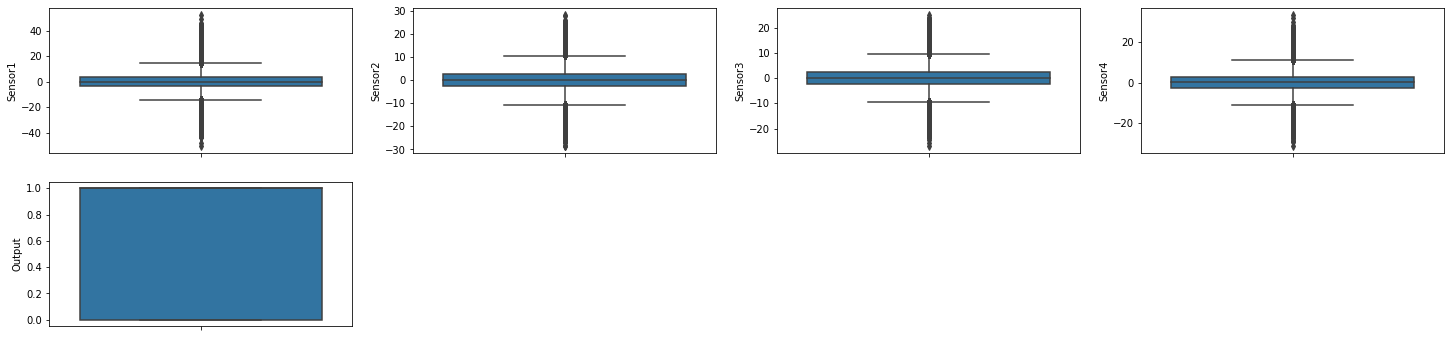

In [18]:
i = 1
plt.figure(figsize= (25, 25))
for features in df.columns:
    plt.subplot(8,4,i)
    sns.boxplot(y=df[features])
    i+=1

In [19]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,94198,94199,94200,94201,94202,94203,94204,94205,94206,94207
Sensor1,-3.93,2.40,6.240,-3.99,1.77,8.040,-4.02,4.91,9.880,-4.46,...,0.416,-1.430,3.7800,-1.21,-7.60,-1.46,-3.880,1.730,8.98,6.16
Sensor2,6.55,9.99,-3.180,-14.10,-6.46,0.963,1.08,-4.48,1.060,5.19,...,3.280,0.855,0.4750,-5.51,-1.55,2.78,0.854,4.070,10.10,5.58
Sensor3,-1.24,-3.24,-0.687,3.85,5.10,-1.540,7.17,4.66,-6.260,-13.30,...,-2.520,-1.640,-5.5400,-3.78,1.26,-1.15,6.420,5.360,1.55,2.41
Sensor4,20.30,8.31,-4.190,-5.66,-9.00,2.540,5.76,1.99,0.919,-2.55,...,5.440,3.580,0.0182,2.23,-3.68,-4.54,-5.470,0.216,3.66,2.04
Output,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,...,0.000,0.000,0.0000,0.00,0.00,0.00,0.000,0.000,0.00,0.00


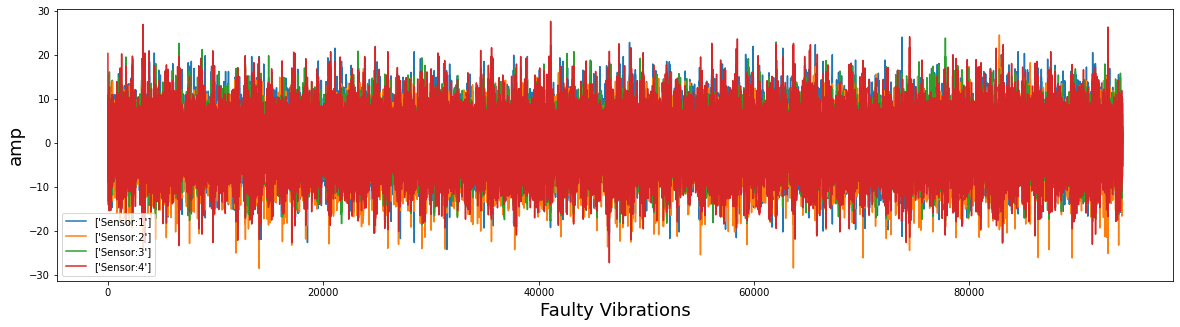

In [20]:
fig, (ax1) = plt.subplots(1, figsize=(20, 5), sharey=True)
for i in range(4):
    sns.lineplot(x=df1.T.columns, y=df1.T.iloc[i, :], ax=ax1, label=[f"Sensor:{i+1}"])
ax1.set_xlabel("Faulty Vibrations", fontsize=18)
ax1.set_ylabel("amp", fontsize=18)
ax1.patch.set_facecolor('white')
# ax1.patch.set_alpha(0.2)

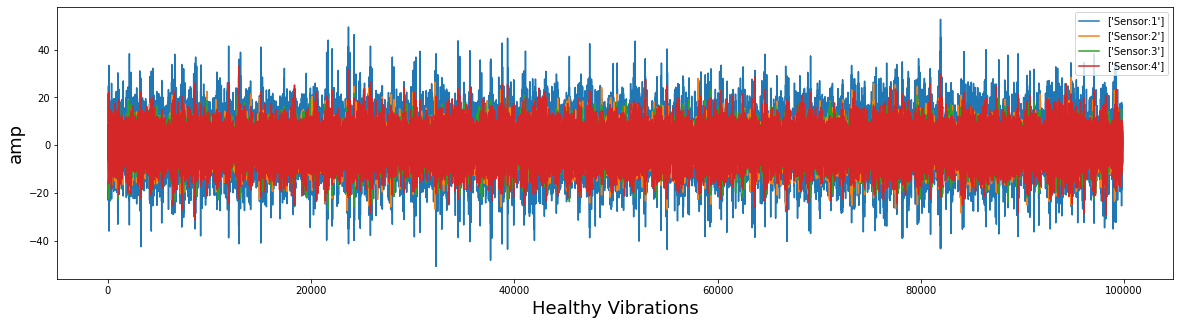

In [21]:
fig, (ax1) = plt.subplots(1, figsize=(20, 5), sharey=True)
for i in range(4):
    sns.lineplot(x=df2.T.columns, y=df2.T.iloc[i, :], ax=ax1, label=[f"Sensor:{i+1}"])
ax1.set_xlabel("Healthy Vibrations", fontsize=18)
ax1.set_ylabel("amp", fontsize=18)
ax1.patch.set_facecolor('white')
# ax1.patch.set_alpha(0.2)

### Splitting The Data

In [22]:
features = df.drop('Output', axis = 1)
target = df['Output']

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

# over = SMOTE(sampling_strategy=0.1)
oversample = SMOTE()
x_smot, y_smot = oversample.fit_resample(features, target)

In [24]:
test_size = 0.3
seed = 44

x_train,x_test,y_train,y_test = train_test_split(x_smot, y_smot, test_size = test_size, random_state = seed)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((139776, 4), (59904, 4), (139776,), (59904,))

# Scaling The data

In [25]:
tr_scalar, ts_scalar = StandardScaler(), StandardScaler()

x_tr_sc, x_ts_sc = tr_scalar.fit_transform(x_train), ts_scalar.fit_transform(x_test)

x_tr_sc.shape, x_ts_sc.shape

((139776, 4), (59904, 4))

# Building The ANN

In [26]:
vibration_model = tf.keras.Sequential()

In [27]:
# Input layer
vibration_model.add(tf.keras.layers.Input(shape = (4,)))

# Hidden layers
vibration_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu', kernel_initializer = 'he_uniform'))
vibration_model.add(tf.keras.layers.Dense(units = 12, activation = 'relu', kernel_initializer = 'he_uniform'))
vibration_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu', kernel_initializer = 'he_uniform'))

# output layer
vibration_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

In [28]:
vibration_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [29]:
vibration_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision'])

In [30]:
# Training the model

history_object = vibration_model.fit(x = x_tr_sc, y = y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
3495/3495 [==============================] - 25s 6ms/step - loss: 0.6609 - accuracy: 0.5978 - precision: 0.6224 - val_loss: 0.6423 - val_accuracy: 0.6148 - val_precision: 0.6565
Epoch 2/50
3495/3495 [==============================] - 15s 4ms/step - loss: 0.6368 - accuracy: 0.6236 - precision: 0.6772 - val_loss: 0.6378 - val_accuracy: 0.6207 - val_precision: 0.6701
Epoch 3/50
3495/3495 [==============================] - 14s 4ms/step - loss: 0.6346 - accuracy: 0.6257 - precision: 0.6812 - val_loss: 0.6369 - val_accuracy: 0.6214 - val_precision: 0.6741
Epoch 4/50
3495/3495 [==============================] - 14s 4ms/step - loss: 0.6332 - accuracy: 0.6265 - precision: 0.6821 - val_loss: 0.6372 - val_accuracy: 0.6221 - val_precision: 0.6950
Epoch 5/50
3495/3495 [==============================] - 15s 4ms/step - loss: 0.6326 - accuracy: 0.6279 - precision: 0.6848 - val_loss: 0.6375 - val_accuracy: 0.6210 - val_precision: 0.6590
Epoch 6/50
3495/3495 [==============================] -